In [52]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_SEED = 1

In [11]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().values.any()

False

How many fradulant transactions next to normal transactions?

In [9]:
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'No. of records')

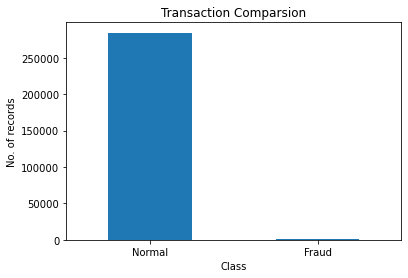

In [86]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Comparsion")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("No. of records")

In [18]:
fraud_df = df[df['Class']==1]
normal_df = df[df['Class']==0]

In [19]:
print(fraud_df.shape)

(492, 31)


In [20]:
print(normal_df.shape)

(284315, 31)


Whats the amount of fraud transactions compared to normal transactions?

In [21]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [22]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

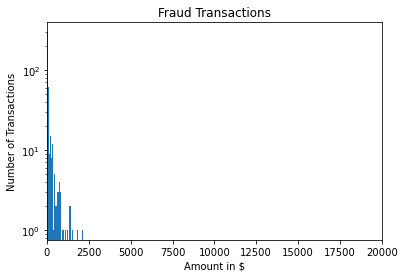

In [87]:
f, (ax1) = plt.subplots(1)
bins = 50
ax1.hist(fraud_df.Amount, bins = bins)
ax1.set_title('Fraud Transactions')
plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

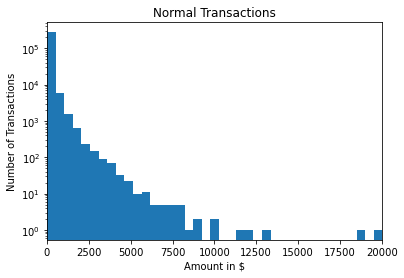

In [88]:
f, (ax2) = plt.subplots(1)
bins = 50
ax2.hist(normal_df.Amount, bins = bins)
ax2.set_title('Normal Transactions')
plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

Does fraud transactions happen more ofter during certain times?

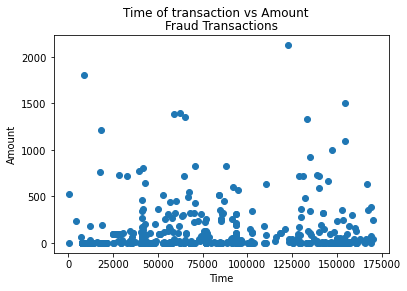

In [89]:
f, (ax1) = plt.subplots(1)
f.suptitle('Time of transaction vs Amount')
ax1.scatter(fraud_df.Time, fraud_df.Amount)
ax1.set_title('Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

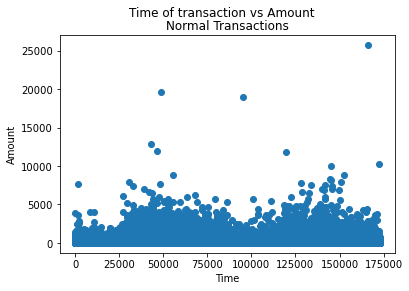

In [90]:
f, (ax1) = plt.subplots(1)
f.suptitle('Time of transaction vs Amount')
ax1.scatter(normal_df.Time, normal_df.Amount)
ax1.set_title('Normal Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [57]:
valid_sample = normal_df.sample(n=492)

In [58]:
Final_sample = pd.concat([valid_sample, fraud_df], axis=0)

In [59]:
Final_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247935,153740.0,-0.893328,-0.009156,1.815855,-2.283963,-1.006780,0.502511,-0.784606,0.554704,0.610705,...,0.120276,0.714937,-0.205873,-0.481203,-0.202943,-0.264887,0.631658,0.322740,3.00,0
78647,57629.0,1.237200,-0.704330,0.485615,-0.526779,-1.279918,-0.991839,-0.415233,-0.197940,-0.779752,...,-0.651606,-1.639097,0.230369,0.362376,-0.163967,0.668130,-0.065990,0.029671,82.50,0
6704,8351.0,-0.241608,1.492818,1.778431,2.537285,0.997451,0.912779,0.605832,-0.103947,-0.345486,...,-0.407816,-0.661679,-0.187234,-0.902531,-0.300617,-0.056123,0.189991,-0.045770,4.38,0
271315,164518.0,-0.137888,1.565422,0.916304,3.275071,1.310499,0.525450,1.041082,0.017051,-2.044122,...,-0.158905,-0.486171,0.081889,0.549140,-0.715004,-0.271210,0.174658,0.208224,7.49,0
238461,149675.0,-0.344912,1.293072,-0.744360,-0.854936,1.105169,-0.268685,0.817811,0.105194,0.095873,...,-0.369621,-0.807993,0.065512,0.110540,-0.314007,0.131638,0.433672,0.196122,3.57,0


In [60]:
Final_sample['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [62]:
X = Final_sample.drop(columns='Class', axis=1)
Y = Final_sample['Class']

In [63]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
247935  153740.0 -0.893328 -0.009156  1.815855 -2.283963 -1.006780  0.502511   
78647    57629.0  1.237200 -0.704330  0.485615 -0.526779 -1.279918 -0.991839   
6704      8351.0 -0.241608  1.492818  1.778431  2.537285  0.997451  0.912779   
271315  164518.0 -0.137888  1.565422  0.916304  3.275071  1.310499  0.525450   
238461  149675.0 -0.344912  1.293072 -0.744360 -0.854936  1.105169 -0.268685   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [64]:
print(Y)

247935    0
78647     0
6704      0
271315    0
238461    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [67]:
model = LogisticRegression()

In [69]:
model.fit(X_train, Y_train)

C:\Users\letme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [71]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.940279542566709


In [72]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [73]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [74]:
from sklearn.cluster import KMeans
from time import time

In [75]:
X=df.iloc[:,:-1]
y=df['Class']
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [76]:
from sklearn.preprocessing import scale

In [77]:
X_scaled=scale(X)
print(X_scaled)

[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


In [78]:
from sklearn.decomposition import PCA

In [79]:
pca=PCA(n_components=2)
print(pca)

PCA(n_components=2)


In [80]:
X_reduced=pca.fit_transform(X_scaled)
print(X_reduced)

[[ 0.42255018 -2.53188787]
 [-0.40071608 -2.07363747]
 [ 1.85759771 -2.57940313]
 ...
 [-0.191287    2.07324988]
 [-0.44429158  1.25001615]
 [ 0.77189639  1.88749405]]


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.2,random_state=2)

In [95]:
model=KMeans(init='k-means++',n_clusters=2,n_init=10)
model.fit(X_train)

KMeans(n_clusters=2)

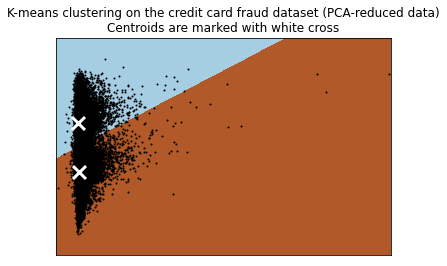

In [96]:
h = .01
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired,aspect='auto', origin='lower')
plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=169, linewidths=3,color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n''Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [97]:
predictions = model.predict(X_test)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))
pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
false_neg_rate = false_neg/(false_pos+false_neg)
accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.45296864576384255
False negative rate (with respect to misclassifications):  0.0009627727856225931
False negative rate (with respect to all the data):  0.0005266669007408447
False negatives, false positives, mispredictions: 30 31130 31160
Total test data points: 56962


In [104]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [106]:
print('Accuracy score on Training Data:', training_data_accuracy)

Accuracy score on Training Data: 0.4515569795255547


In [108]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [109]:
print('Accuracy score on Test Data:', test_data_accuracy)

Accuracy score on Test Data: 0.45296864576384255
